# Data preparation
- Data Cleansing
    + Errors from data entry
    + Physically impossible values
    + Missing values
    + Outliers
    + Spaces, typos
    + Errors against codebook
- Data Transforming
    + Aggregating data
    + Extrapolating data
    + Derived measures
    + Creating dummies
    + Reducing number of variables
- Data Integrating
    + Merging/join data sets
    + Set operators
    + Creating views

In [19]:
import pandas as pd
import glob
from datetime import datetime 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
import math
import re
from collections import deque
plt.style.use('ggplot')

# Data Integrating

In [20]:
files_to_merge = ['/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/copper.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/crude_oil.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/DXY.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/EURUSD.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/MSCI.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/NASDAQ.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/NLR.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/RUT.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/silver.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/SP500.csv',
                  '/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/VIX.csv',
                  ]  
for file in files_to_merge:
    df = pd.read_csv(f'{file}')
    print(df.head(2))

         date  copper
0  19/12/2023   3.896
1  18/12/2023   3.848
         date  crude_oil
0  19/12/2023      73.44
1  18/12/2023      72.47
         date     DXY
0  19/12/2023  102.17
1  18/12/2023  102.51
         date  EURUSD
0  20/12/2023  1.0981
1  19/12/2023  1.0924
         date    MSCI
0  19/12/2023  542.53
1  18/12/2023  532.86
         date    NASDAQ
0  19/12/2023  15003.22
1  18/12/2023  14904.81
         date    NLR
0  19/12/2023  70.24
1  18/12/2023  71.50
         date      RUT
0  19/12/2023  2020.95
1  18/12/2023  1982.42
         date  silver
0  19/12/2023  24.040
1  18/12/2023  23.831
         date    SP500
0  19/12/2023  4768.37
1  18/12/2023  4740.56
         date    VIX
0  19/12/2023  12.53
1  18/12/2023  12.56


In [21]:
import pandas as pd
import os

gold_df = pd.read_csv('/Users/ibulmnie/Documents/GitHub/GoldPricePrediction-1/model/linh/predict/Gold.csv')  
 

gold_df['date'] = pd.to_datetime(gold_df['date'], format='%d/%m/%Y')
gold_df = gold_df.drop("i", axis=1)

merged_data = gold_df

for file in files_to_merge:
    df = pd.read_csv(f'{file}')
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    merged_data = pd.merge(merged_data, df, on='date', how='left')
merged_data .rename(columns = {'Open': 'GOLD_open',
                              'High': 'GOLD_high',
                              'Close': 'GOLD_close',
                              'Low': 'GOLD_low',
                              'Date': 'Date'} ,inplace=True)

In [22]:
merged_data

,date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,RUT,silver,SP500,VIX
0,2023-12-19,2025.2,2042.7,2025.2,2038.4,3.8960,73.44,102.17,1.0924,542.53,15003.22,70.24,2020.95,24.040,4768.37,12.53
1,2023-12-18,2024.3,2032.8,2024.0,2026.3,3.8480,72.47,102.51,1.0895,532.86,14904.81,71.50,1982.42,23.831,4740.56,12.56
2,2023-12-15,2032.6,2043.4,2018.3,2021.1,3.8850,71.43,102.55,1.0994,531.58,14813.92,74.05,1985.13,23.870,4719.19,12.28
3,2023-12-14,2024.7,2040.1,2024.3,2030.2,3.8885,71.58,101.96,1.0886,542.11,14761.56,75.67,2000.51,24.096,4719.55,12.48
4,2023-12-13,1978.5,2024.8,1975.0,1982.3,3.7860,69.47,102.87,1.0799,546.37,14733.96,73.85,1947.51,22.639,4707.09,12.19
5,2023-12-12,1984.2,1994.2,1977.8,1977.8,3.7860,68.61,103.87,1.0767,526.02,14533.40,73.86,1881.27,22.728,4643.70,12.07
6,2023-12-11,2004.1,2004.2,1977.2,1978.0,3.7800,71.32,104.10,1.0766,516.61,14432.49,73.66,1883.68,22.773,4622.44,12.63
7,2023-12-08,2031.7,2033.1,1995.0,1998.3,3.8200,71.23,104.01,1.0792,506.68,14403.97,73.63,1880.82,22.971,4604.37,12.35
8,2023-12-07,2029.2,2034.9,2024.0,2029.9,3.7845,69.34,103.54,1.0767,508.44,14339.99,73.02,1868.25,23.732,4585.59,13.06
9,2023-12-06,2019.9,2035.8,2019.0,2030.5,3.7165,69.38,104.15,1.0794,515.11,14146.71,73.07,1852.05,23.889,4549.34,12.97


In [23]:
merged_data.columns

Index(['date', 'GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
       'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR', 'RUT', 'silver',
       'SP500', 'VIX'],
      dtype='object')

In [24]:
rows, cols = merged_data.shape
print("There are {} rows.".format(rows))
print("There are {} columns.".format(cols))

There are 33 rows.
There are 16 columns.


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        33 non-null     datetime64[ns]
 1   GOLD_open   33 non-null     float64       
 2   GOLD_high   33 non-null     float64       
 3   GOLD_low    33 non-null     float64       
 4   GOLD_close  33 non-null     float64       
 5   copper      33 non-null     float64       
 6   crude_oil   33 non-null     float64       
 7   DXY         32 non-null     float64       
 8   EURUSD      32 non-null     float64       
 9   MSCI        31 non-null     float64       
 10  NASDAQ      31 non-null     float64       
 11  NLR         31 non-null     float64       
 12  RUT         31 non-null     float64       
 13  silver      32 non-null     float64       
 14  SP500       31 non-null     float64       
 15  VIX         31 non-null     float64       
dtypes: datetime64[ns](1), float6

In [26]:
dd = merged_data.drop(['date'], axis = 1)

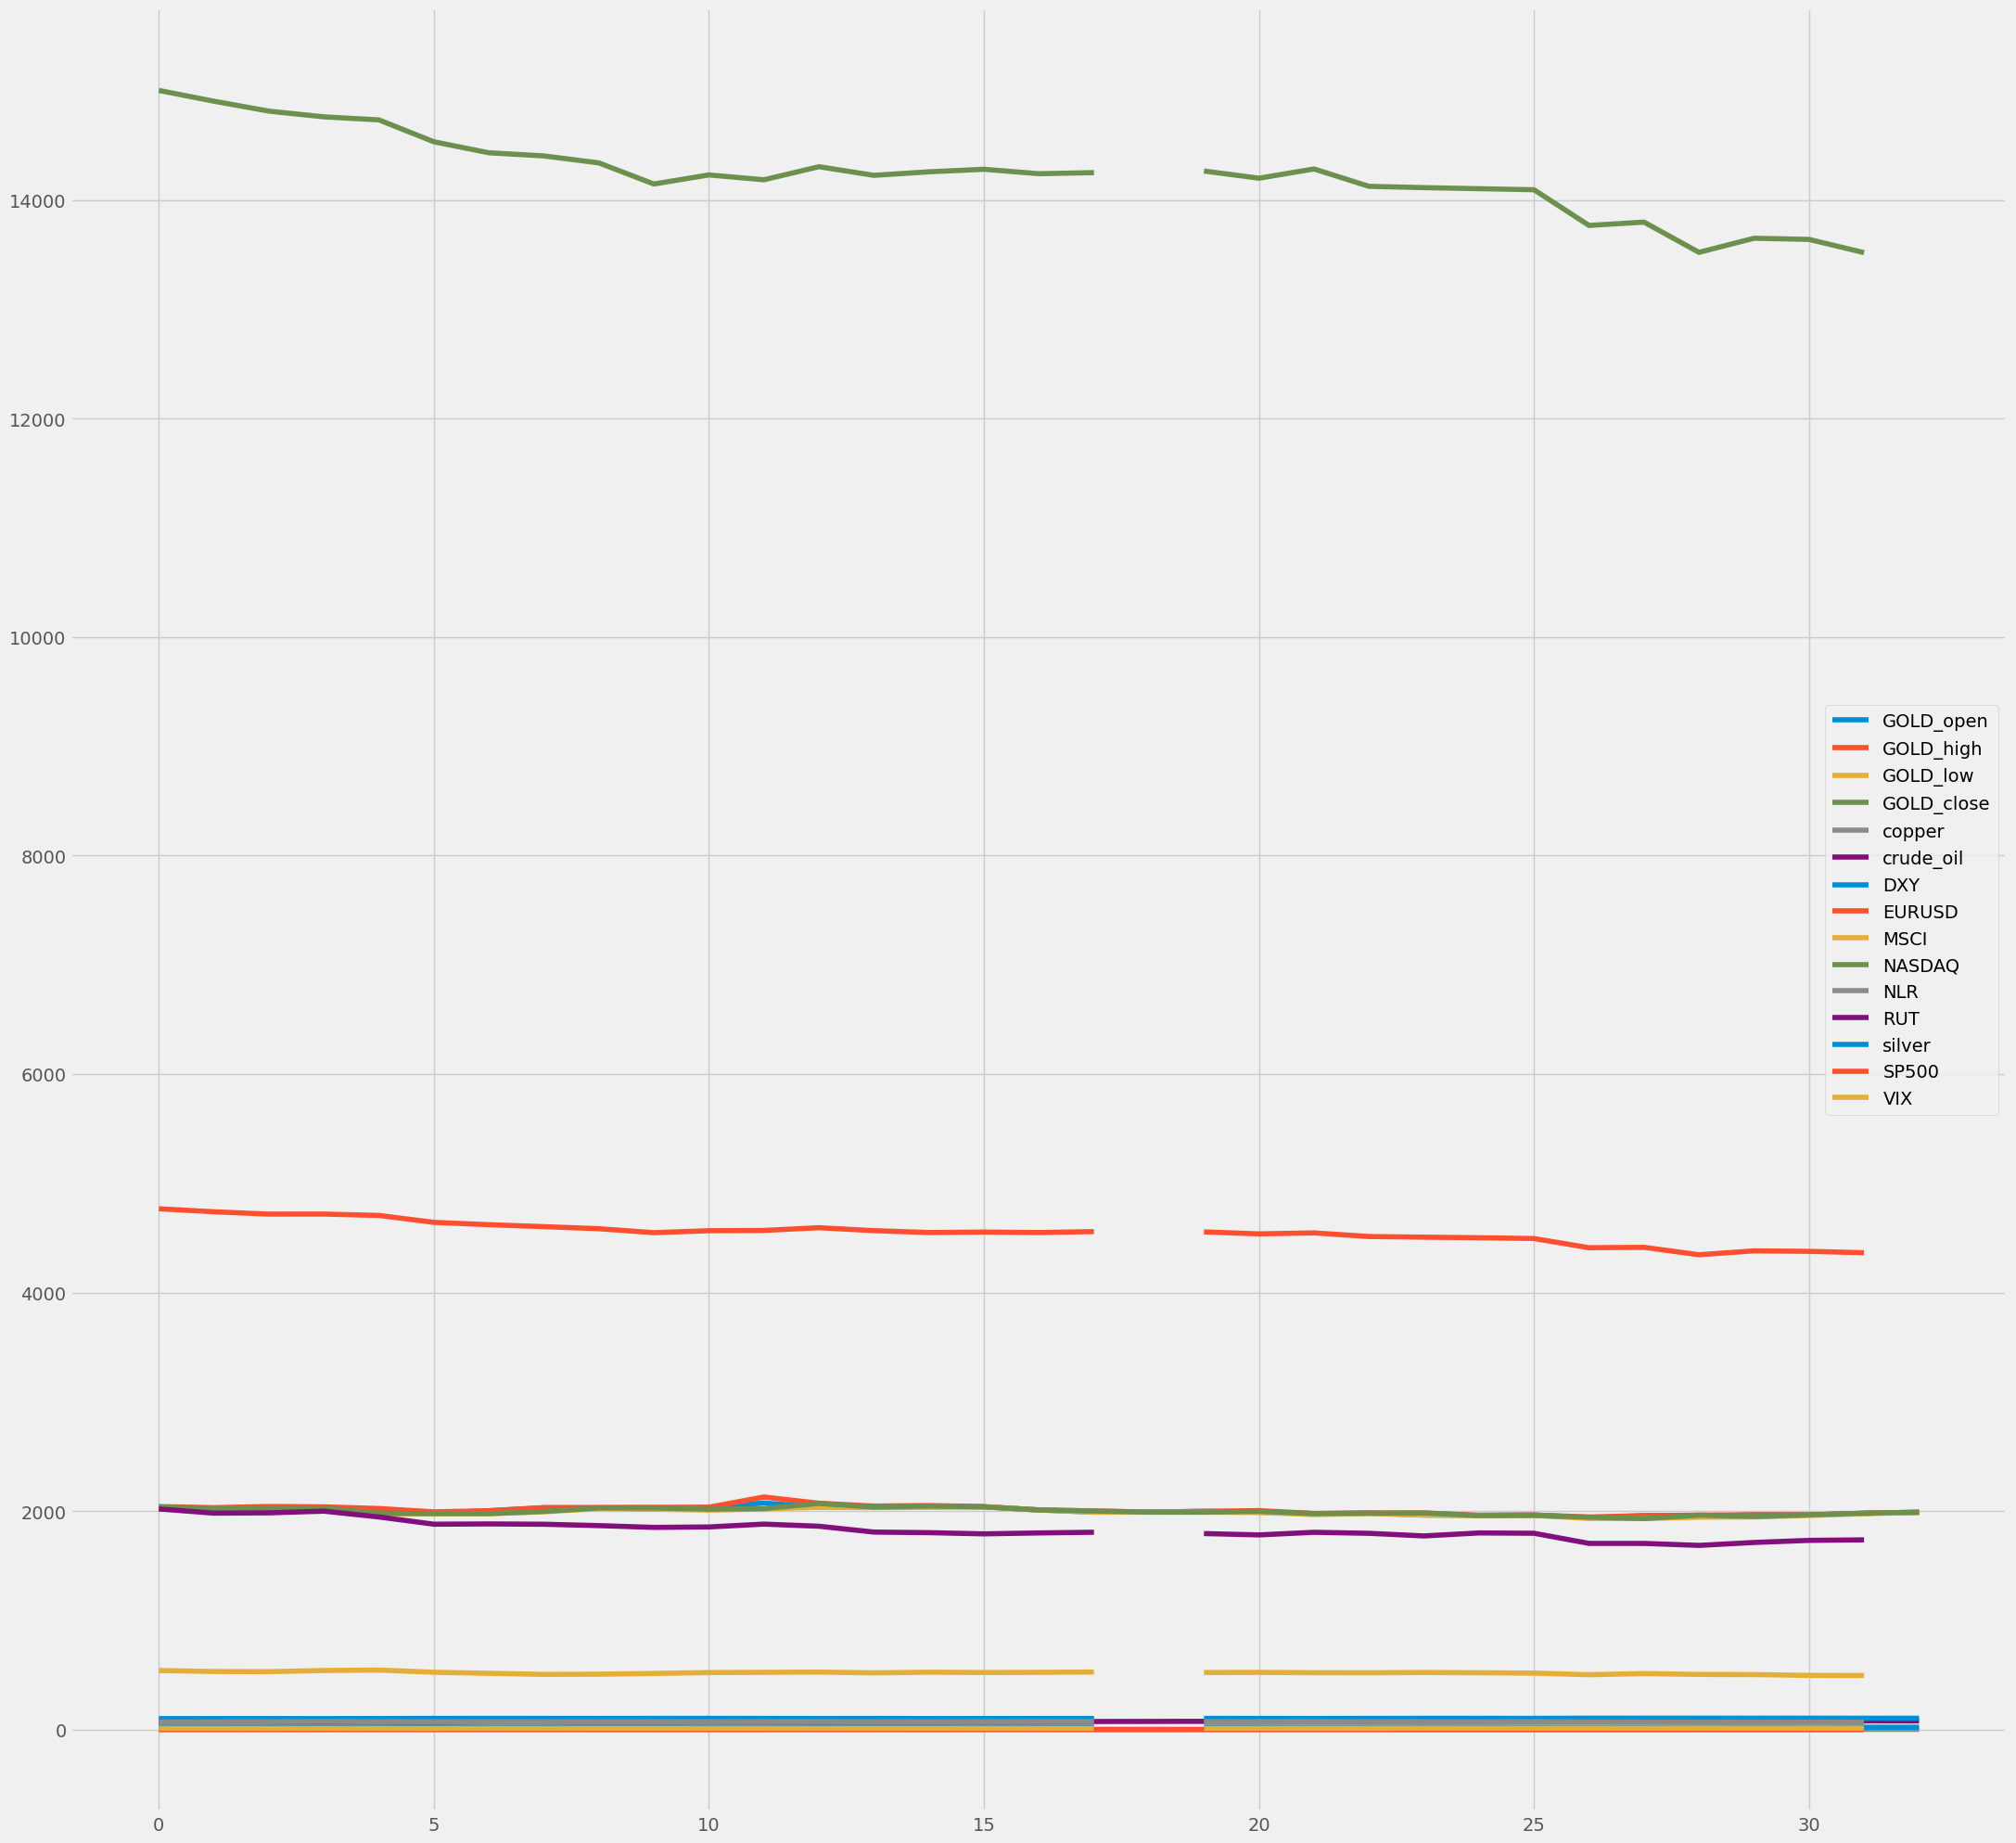

In [27]:
plt.rcParams['figure.figsize'] = [24, 24] #resize the plot
plt.style.use('fivethirtyeight')
#plt.figure(figsize = (12, 8))

dd.plot()
plt.show()

In [28]:
dd.describe().drop(['25%', '50%', '75%']).transpose()

,count,mean,std,min,max
GOLD_open,33.0,2000.848485,32.980554,1939.9000,2075.3000
GOLD_high,33.0,2010.112121,39.408968,1947.2000,2130.2000
GOLD_low,33.0,1991.896970,31.281809,1932.6000,2039.7000
GOLD_close,33.0,1998.372727,33.005968,1932.6000,2071.0000
copper,33.0,3.765000,0.080829,3.5835,3.9090
crude_oil,33.0,74.729091,3.269292,68.6100,80.8200
DXY,32.0,103.898750,1.079590,101.9600,105.9100
EURUSD,32.0,1.084234,0.009795,1.0668,1.1006
MSCI,31.0,520.953548,12.181390,496.5600,546.3700
NASDAQ,31.0,14230.222258,377.754931,13518.7800,15003.2200


In [29]:
#To check for duplicates
dd.duplicated().sum()

0

<Axes: >

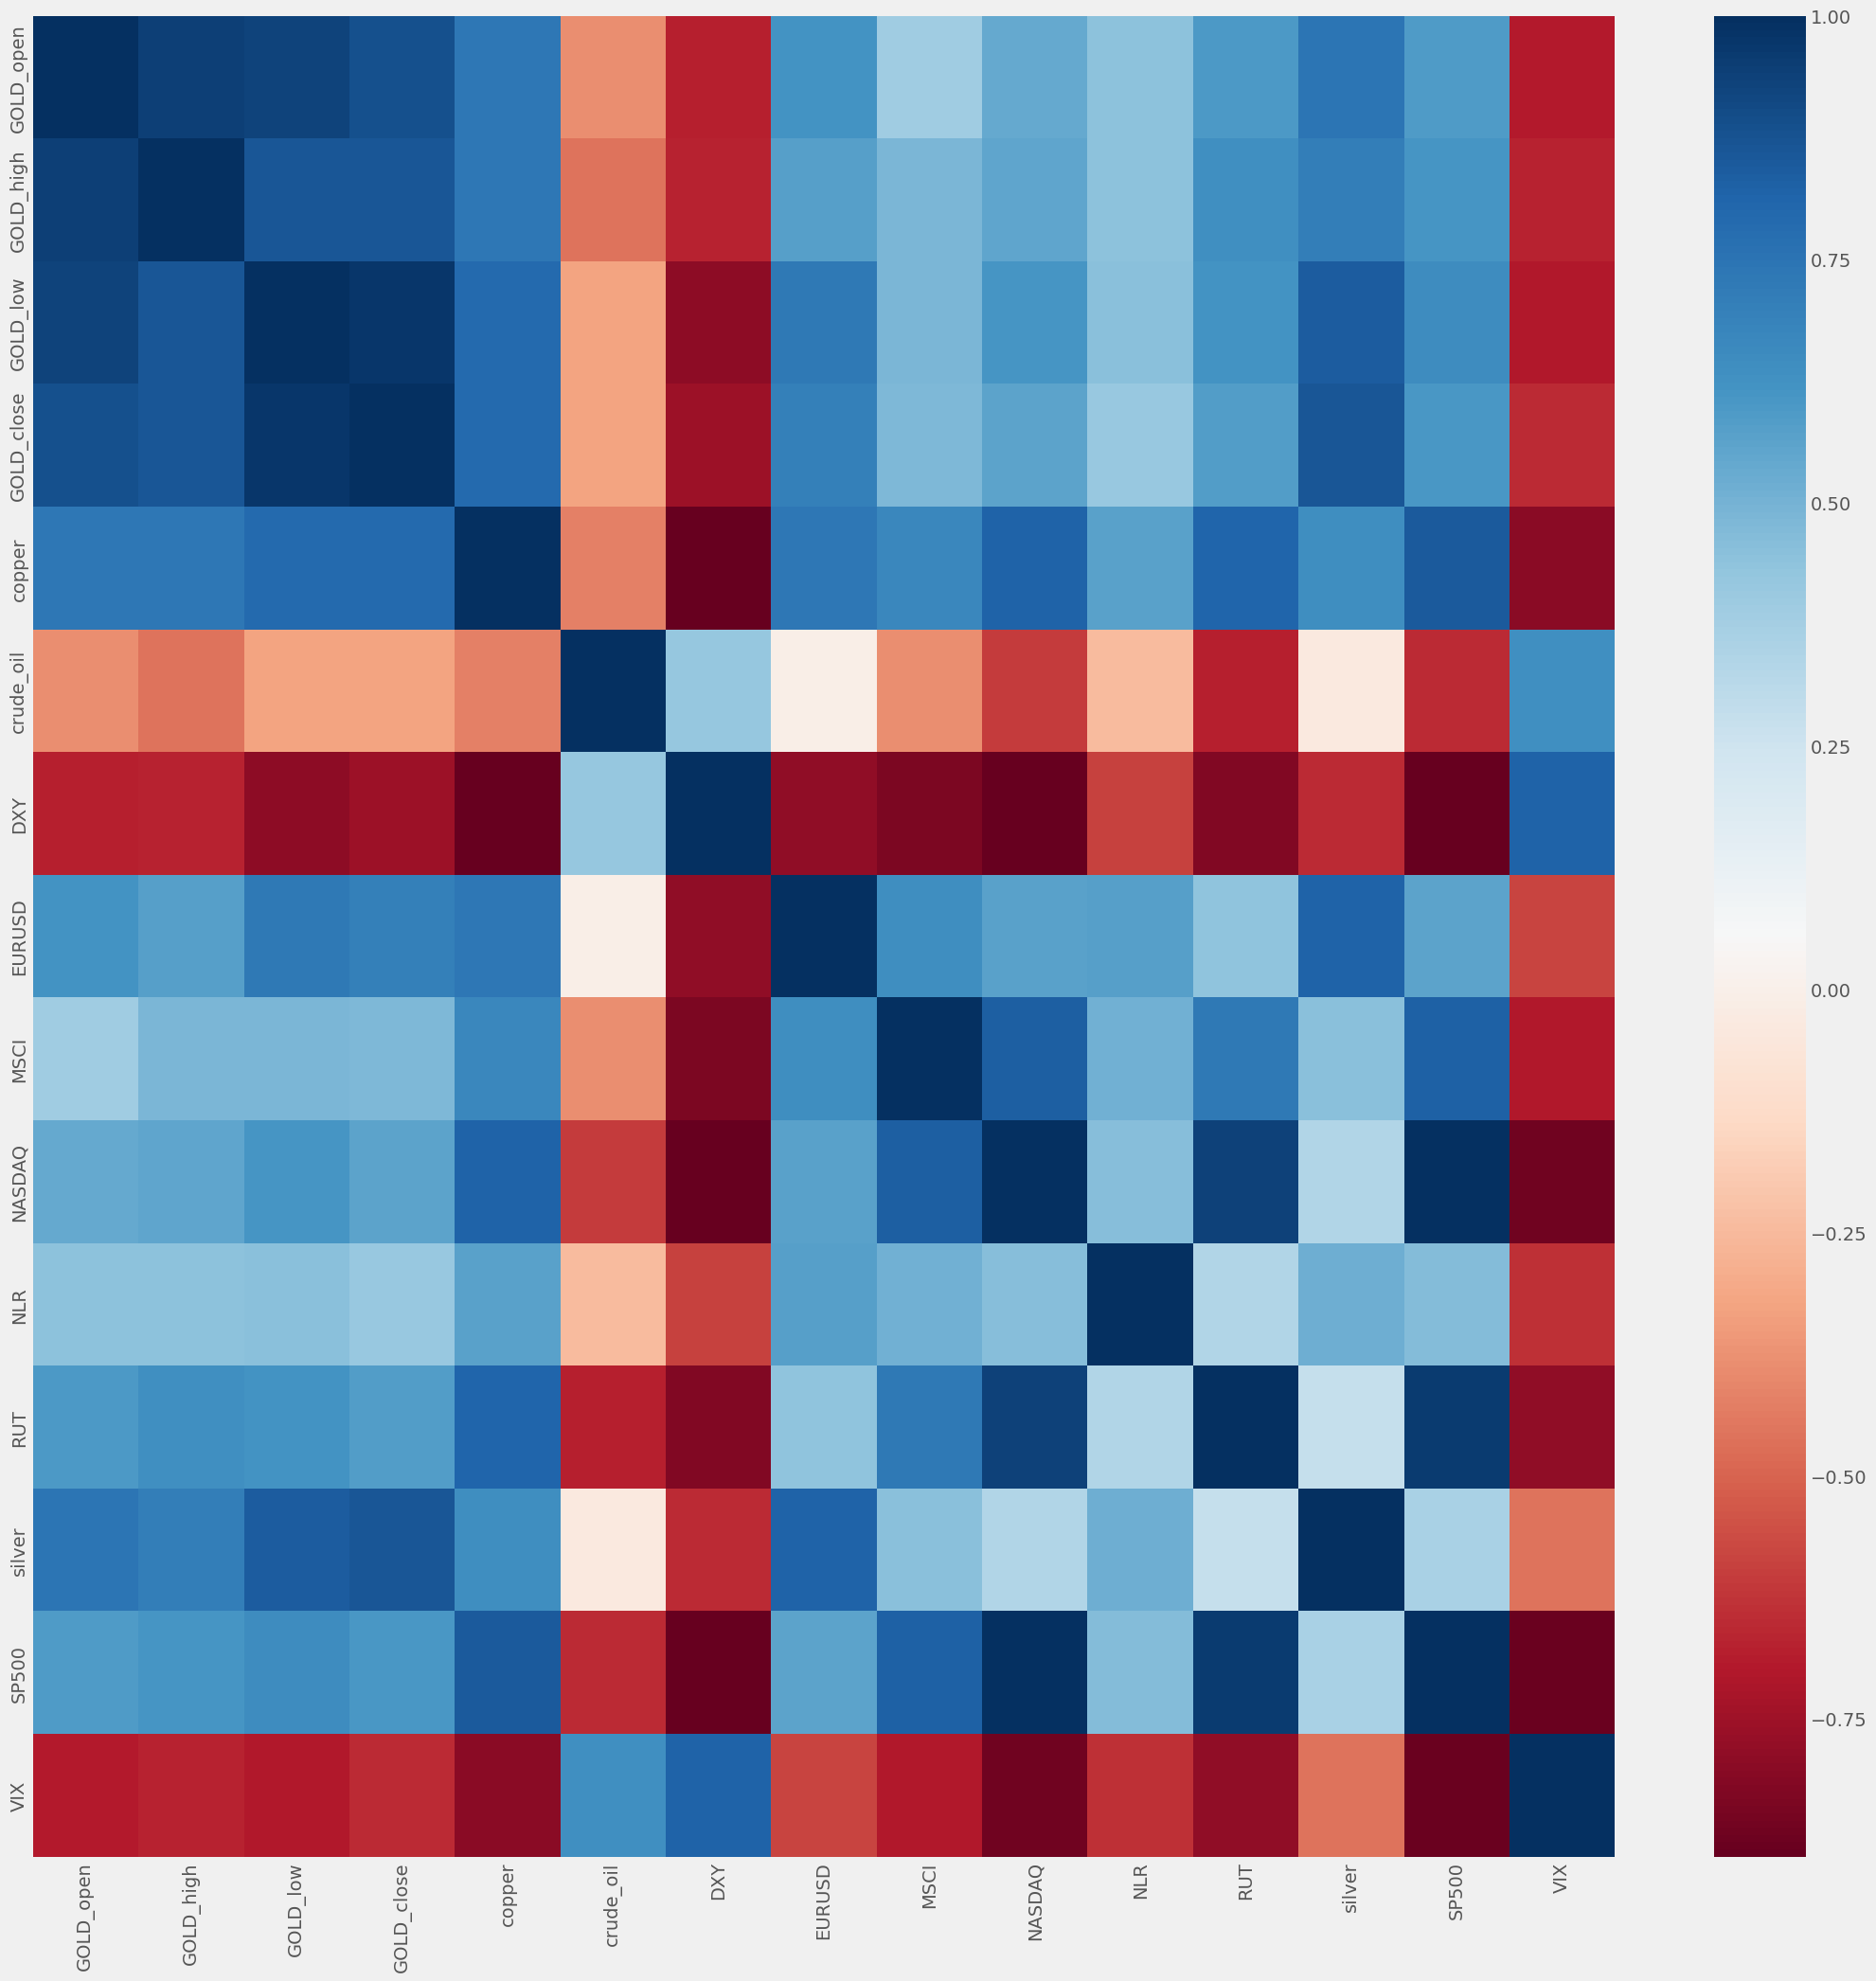

In [30]:
sns.heatmap(dd.corr(), cmap="RdBu")

# Data cleansing

## 1. Evaluating Target Variables

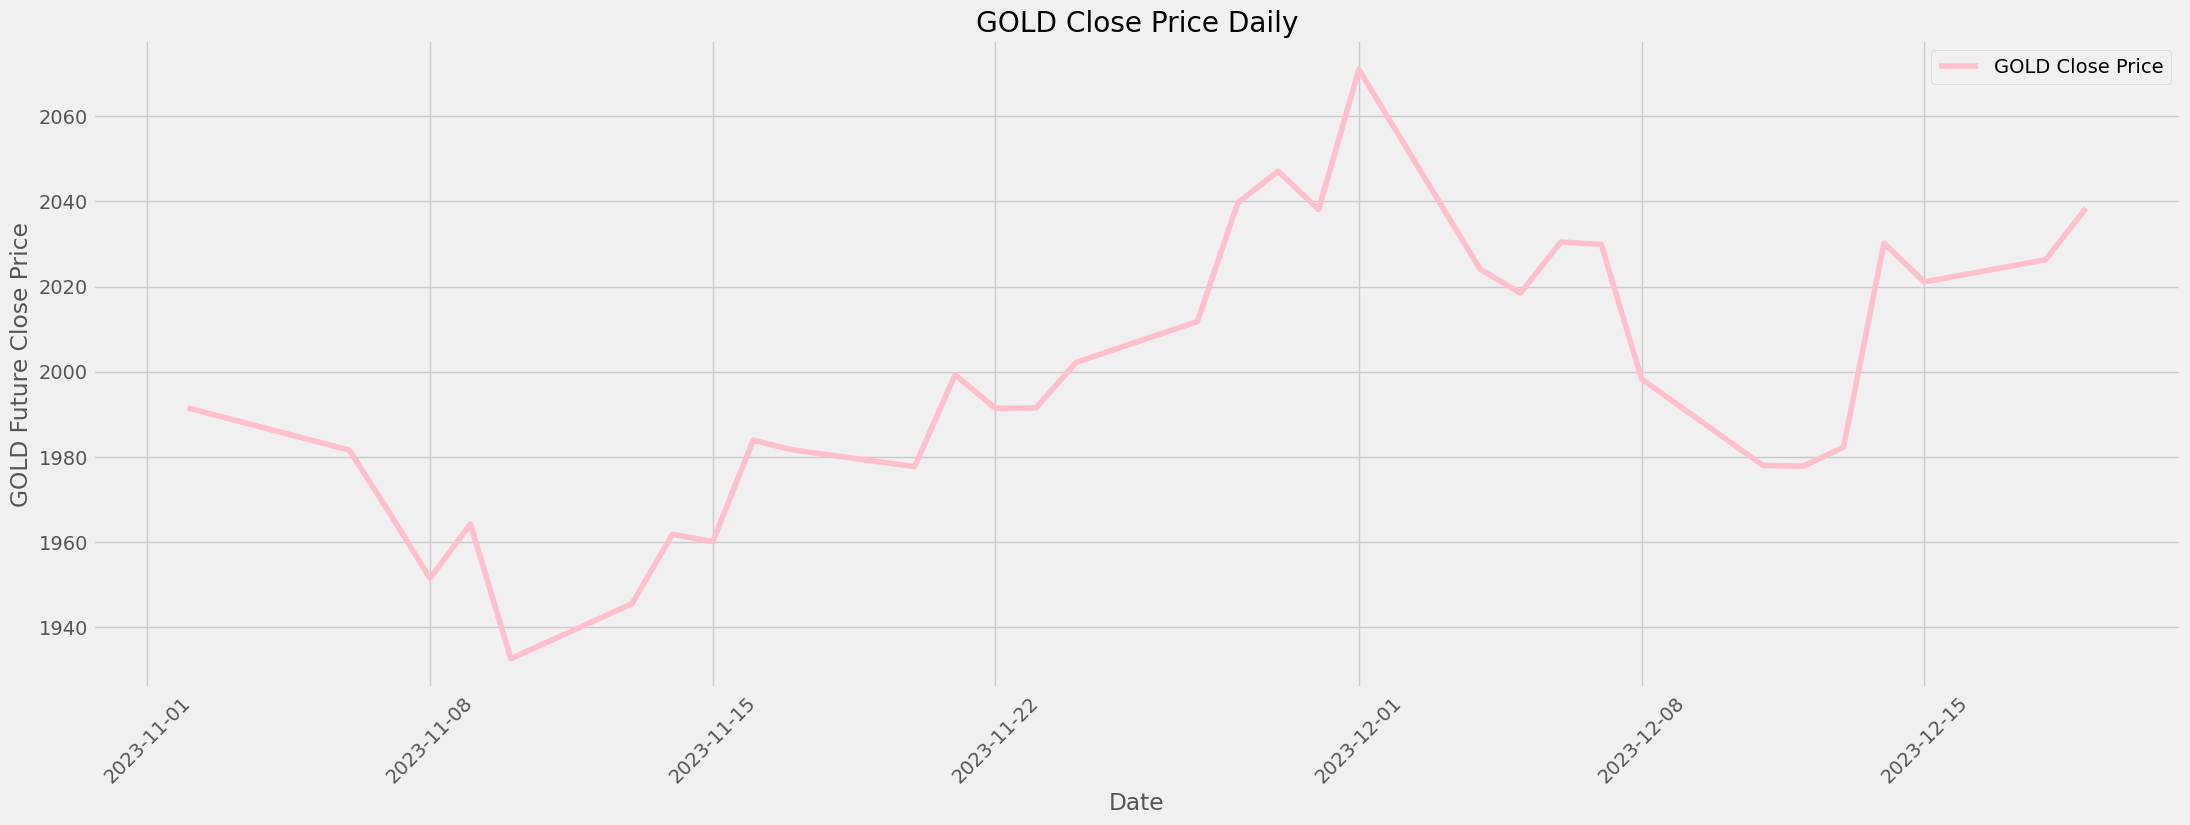

In [31]:
import matplotlib.pyplot as plt

# Assuming merged_data['Date'] is in datetime format
fig, ax = plt.subplots(figsize=(24, 8))
plt.style.use('fivethirtyeight')

ax.plot(merged_data['date'], merged_data['GOLD_close'], color='pink', label='GOLD Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('GOLD Future Close Price')
ax.set_title('GOLD Close Price Daily')
ax.grid(True)
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.show()


In [32]:
merged_data['GOLD_close'].describe()

count      33.000000
mean     1998.372727
std        33.005968
min      1932.600000
25%      1977.800000
50%      1991.500000
75%      2026.300000
max      2071.000000
Name: GOLD_close, dtype: float64

In [33]:
print("Number of records with NULL price: ", merged_data['GOLD_close'].isna().sum())

Number of records with NULL price:  0


### Before clipping the values of the target variables

Skewness:  0.09143273141098421


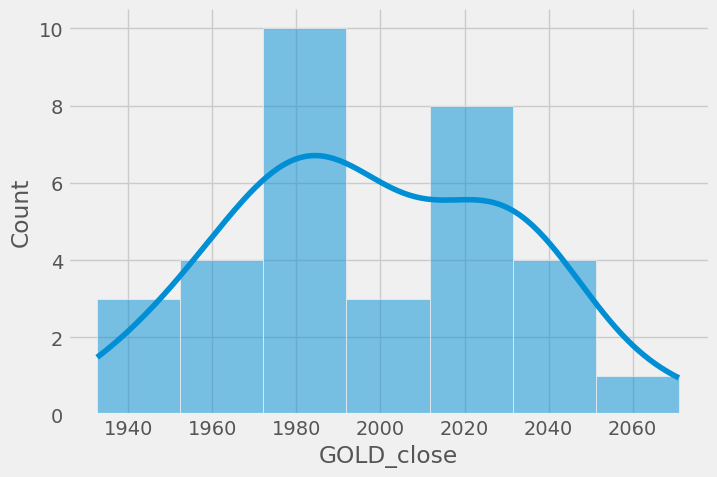

In [34]:
plt.style.use('fivethirtyeight')
price_dist = sns.displot(merged_data['GOLD_close'], kde=True)
price_dist.fig.set_size_inches(8,5)
print("Skewness: ", merged_data['GOLD_close'].skew())

### Visualization
Checking the distribution of the Gold Price about outliers:


In [35]:
columns_to_plot = ['GOLD_open', 'GOLD_high', 'GOLD_low', 'GOLD_close', 'copper',
                   'crude_oil', 'DXY', 'EURUSD', 'MSCI', 'NASDAQ', 'NLR',
                   'RUT', 'silver', 'SP500', 'VIX']

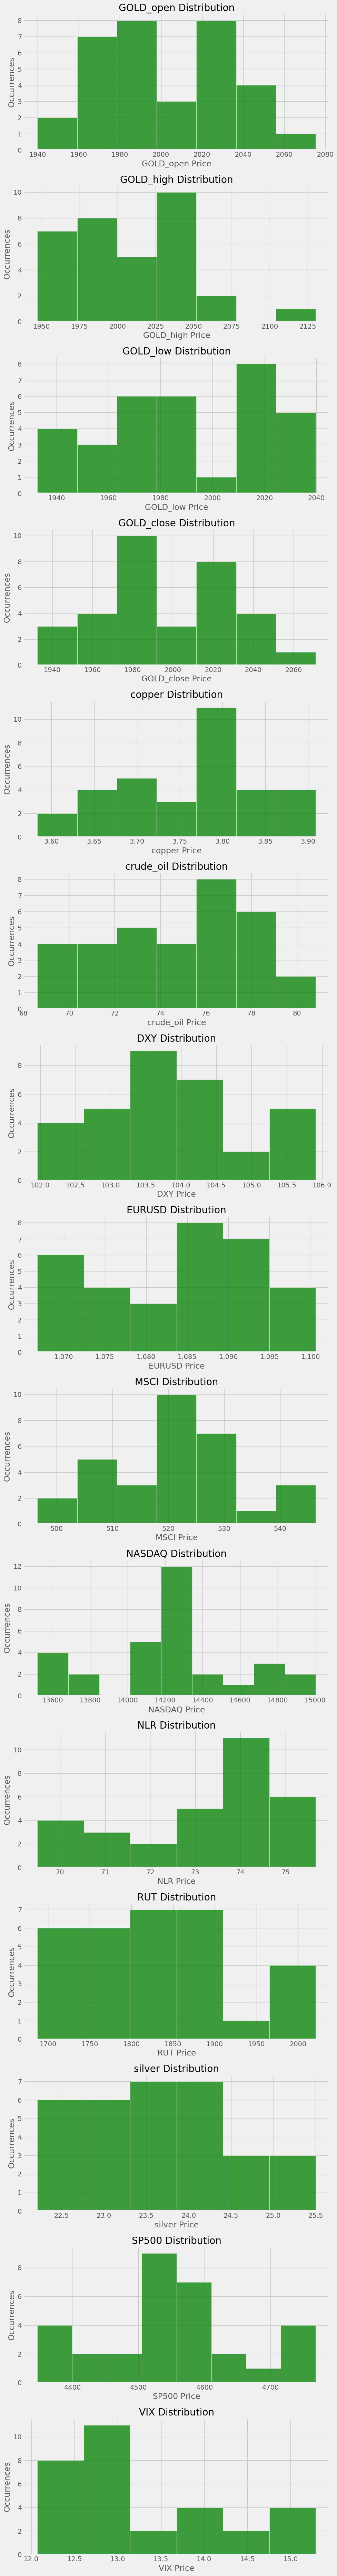

In [36]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 5*len(columns_to_plot)))
plt.style.use('fivethirtyeight')
# Iterate through columns and plot
for i, column in enumerate(columns_to_plot):
    sns.histplot(dd[column], color='green', ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(f'{column} Price')
    axes[i].set_ylabel('Occurrences')

# Adjust layout
plt.tight_layout()
plt.show()

## 2. Handling NULL Values

### NULL values

In [37]:
null_count_arr = merged_data.isna().sum().sort_values(ascending=False)
null_count_arr

MSCI          2
NASDAQ        2
NLR           2
RUT           2
SP500         2
VIX           2
DXY           1
EURUSD        1
silver        1
date          0
GOLD_open     0
GOLD_high     0
GOLD_low      0
GOLD_close    0
copper        0
crude_oil     0
dtype: int64

Text(0, 0.5, 'Missing Values (%)')

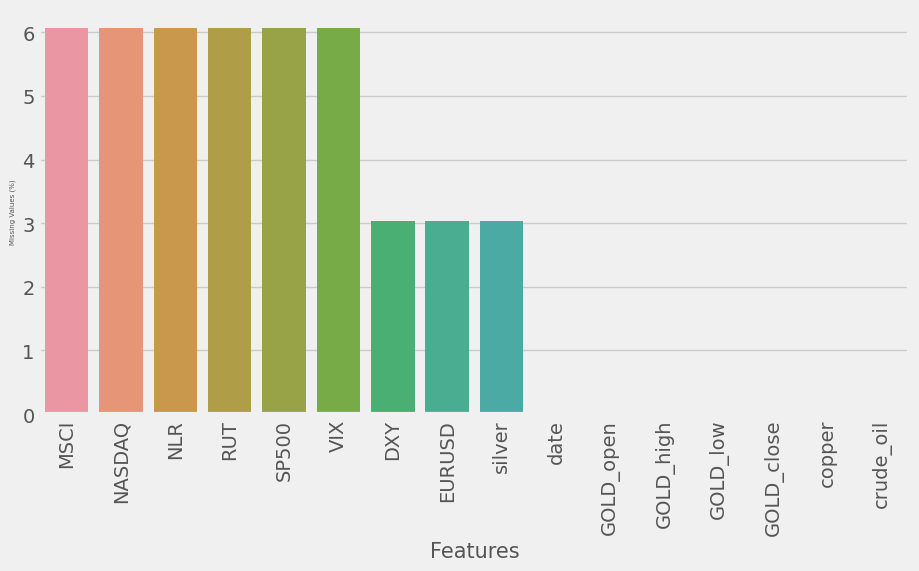

In [38]:
# plot the distribution of missing values by 24 features 
null_ratio = (null_count_arr.sort_values(ascending=False)[:24]/df.shape[0])*100
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
sns.barplot(x = null_ratio.index, y = null_ratio)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Missing Values (%)', fontsize = 5)

By observing the above information, we realize there is one problem with NULL data.
- Weekly Features and Some GOLD Features:
    + Issue: Some GOLD features lose data on Saturday and Sunday, and some weekly features only lose data on Saturday and Friday. Other features mostly lose data on Saturday and Sunday.

    + Solution: For missing data, set the value equal to the value of the previous date.

    + Implementation:

        - Identify the columns with missing values related to the second problem.
        - Use the fillna method to fill missing values with the previous value in the column. 


In [39]:
import pandas as pd
null_data = merged_data.copy()
null_data['DayOfWeek'] = merged_data['date'].dt.day_name()

null_values_by_day = null_data.groupby('DayOfWeek').apply(lambda x: x.isnull().sum())

# In kết quả
print("Số giá trị null theo ngày:")
print(null_values_by_day)


Số giá trị null theo ngày:
           date  GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper   
DayOfWeek                                                             
Friday        0          0          0         0           0       0  \
Monday        0          0          0         0           0       0   
Thursday      0          0          0         0           0       0   
Tuesday       0          0          0         0           0       0   
Wednesday     0          0          0         0           0       0   

           crude_oil  DXY  EURUSD  MSCI  NASDAQ  NLR  RUT  silver  SP500  VIX   
DayOfWeek                                                                       
Friday             0    0       0     0       0    0    0       0      0    0  \
Monday             0    0       0     0       0    0    0       0      0    0   
Thursday           0    1       1     2       2    2    2       1      2    2   
Tuesday            0    0       0     0       0    0    0       0     

### First Problem (FED with Monthly Frequency)
### Second Problem (Weekly Features and Some GOLD Features)

In [40]:
merged_data.sort_values(by='date', ascending=True, inplace=True)
merged_data.reset_index(inplace=True, drop=True)

merged_data.fillna(method='ffill', inplace=True)

merged_data.sort_values(by='date', ascending=False, inplace=True)
merged_data.reset_index(inplace=True, drop=True)
merged_data.fillna(method='ffill', inplace=True)

merged_data

,date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,RUT,silver,SP500,VIX
0,2023-12-19,2025.2,2042.7,2025.2,2038.4,3.8960,73.44,102.17,1.0924,542.53,15003.22,70.24,2020.95,24.040,4768.37,12.53
1,2023-12-18,2024.3,2032.8,2024.0,2026.3,3.8480,72.47,102.51,1.0895,532.86,14904.81,71.50,1982.42,23.831,4740.56,12.56
2,2023-12-15,2032.6,2043.4,2018.3,2021.1,3.8850,71.43,102.55,1.0994,531.58,14813.92,74.05,1985.13,23.870,4719.19,12.28
3,2023-12-14,2024.7,2040.1,2024.3,2030.2,3.8885,71.58,101.96,1.0886,542.11,14761.56,75.67,2000.51,24.096,4719.55,12.48
4,2023-12-13,1978.5,2024.8,1975.0,1982.3,3.7860,69.47,102.87,1.0799,546.37,14733.96,73.85,1947.51,22.639,4707.09,12.19
5,2023-12-12,1984.2,1994.2,1977.8,1977.8,3.7860,68.61,103.87,1.0767,526.02,14533.40,73.86,1881.27,22.728,4643.70,12.07
6,2023-12-11,2004.1,2004.2,1977.2,1978.0,3.7800,71.32,104.10,1.0766,516.61,14432.49,73.66,1883.68,22.773,4622.44,12.63
7,2023-12-08,2031.7,2033.1,1995.0,1998.3,3.8200,71.23,104.01,1.0792,506.68,14403.97,73.63,1880.82,22.971,4604.37,12.35
8,2023-12-07,2029.2,2034.9,2024.0,2029.9,3.7845,69.34,103.54,1.0767,508.44,14339.99,73.02,1868.25,23.732,4585.59,13.06
9,2023-12-06,2019.9,2035.8,2019.0,2030.5,3.7165,69.38,104.15,1.0794,515.11,14146.71,73.07,1852.05,23.889,4549.34,12.97


In [41]:
# Verify the changes
null_count_arr_after_fill = merged_data.isna().sum().sort_values(ascending=False)
print(null_count_arr_after_fill)

date          0
GOLD_open     0
GOLD_high     0
GOLD_low      0
GOLD_close    0
copper        0
crude_oil     0
DXY           0
EURUSD        0
MSCI          0
NASDAQ        0
NLR           0
RUT           0
silver        0
SP500         0
VIX           0
dtype: int64


### Distribution of Columns

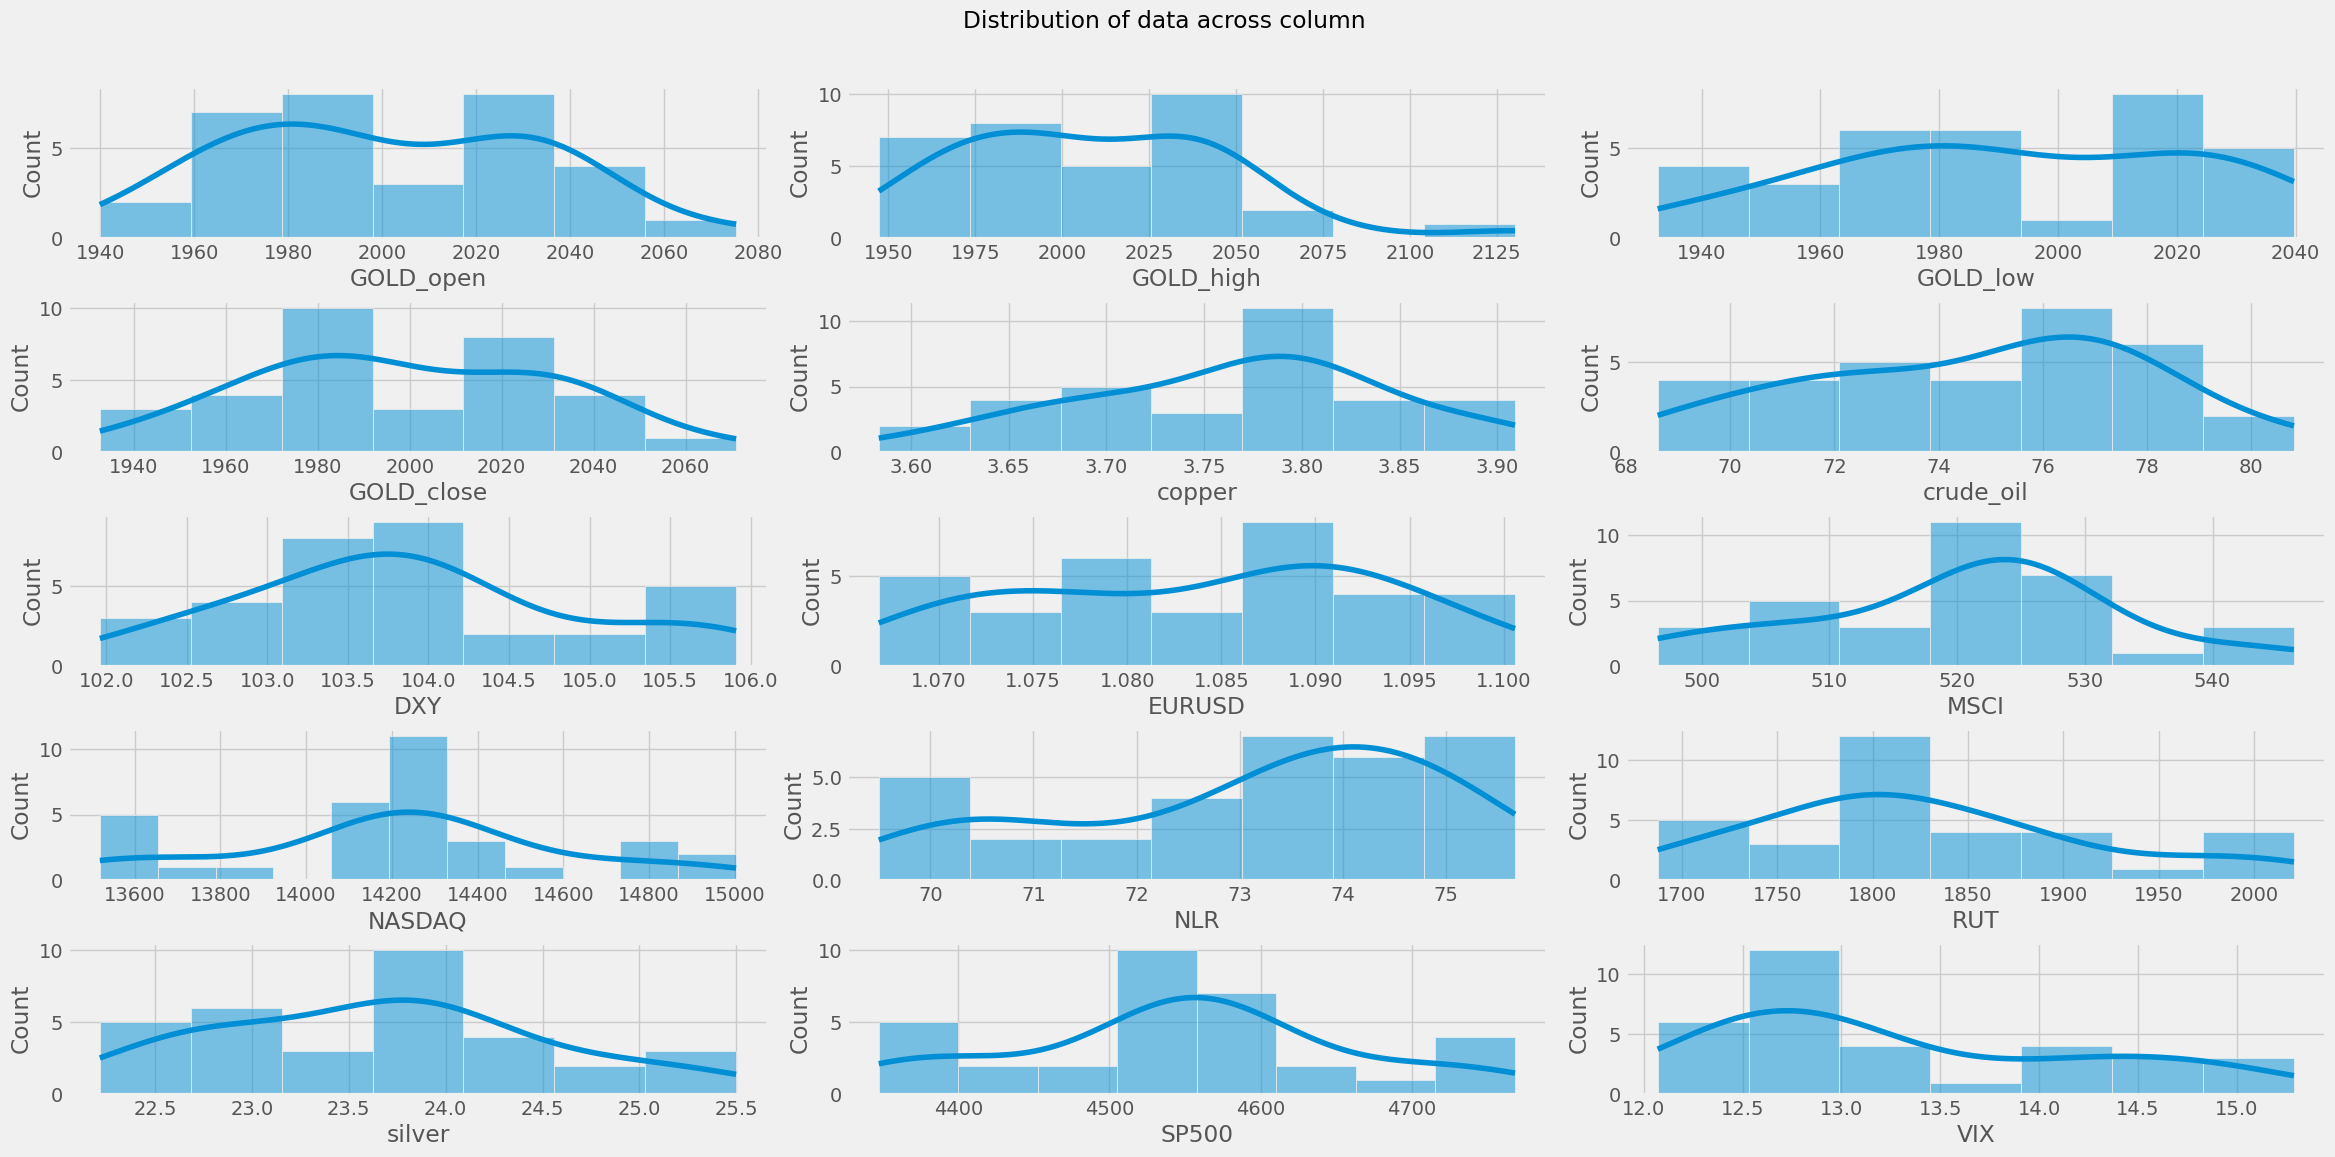

In [42]:
fig = plt.figure(figsize=(24, 12)) 
plt.style.use('fivethirtyeight')
fig.suptitle('Distribution of data across column')
temp = merged_data.drop("date", axis=1).columns.tolist()

cols = 3
rows = (len(temp) + cols - 1) // cols  

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=merged_data, x=item, kde=True)

plt.tight_layout(pad=2.0, w_pad=0.1, h_pad=0.5)  
plt.show()

## 3. Correlation Analysis

<Axes: >

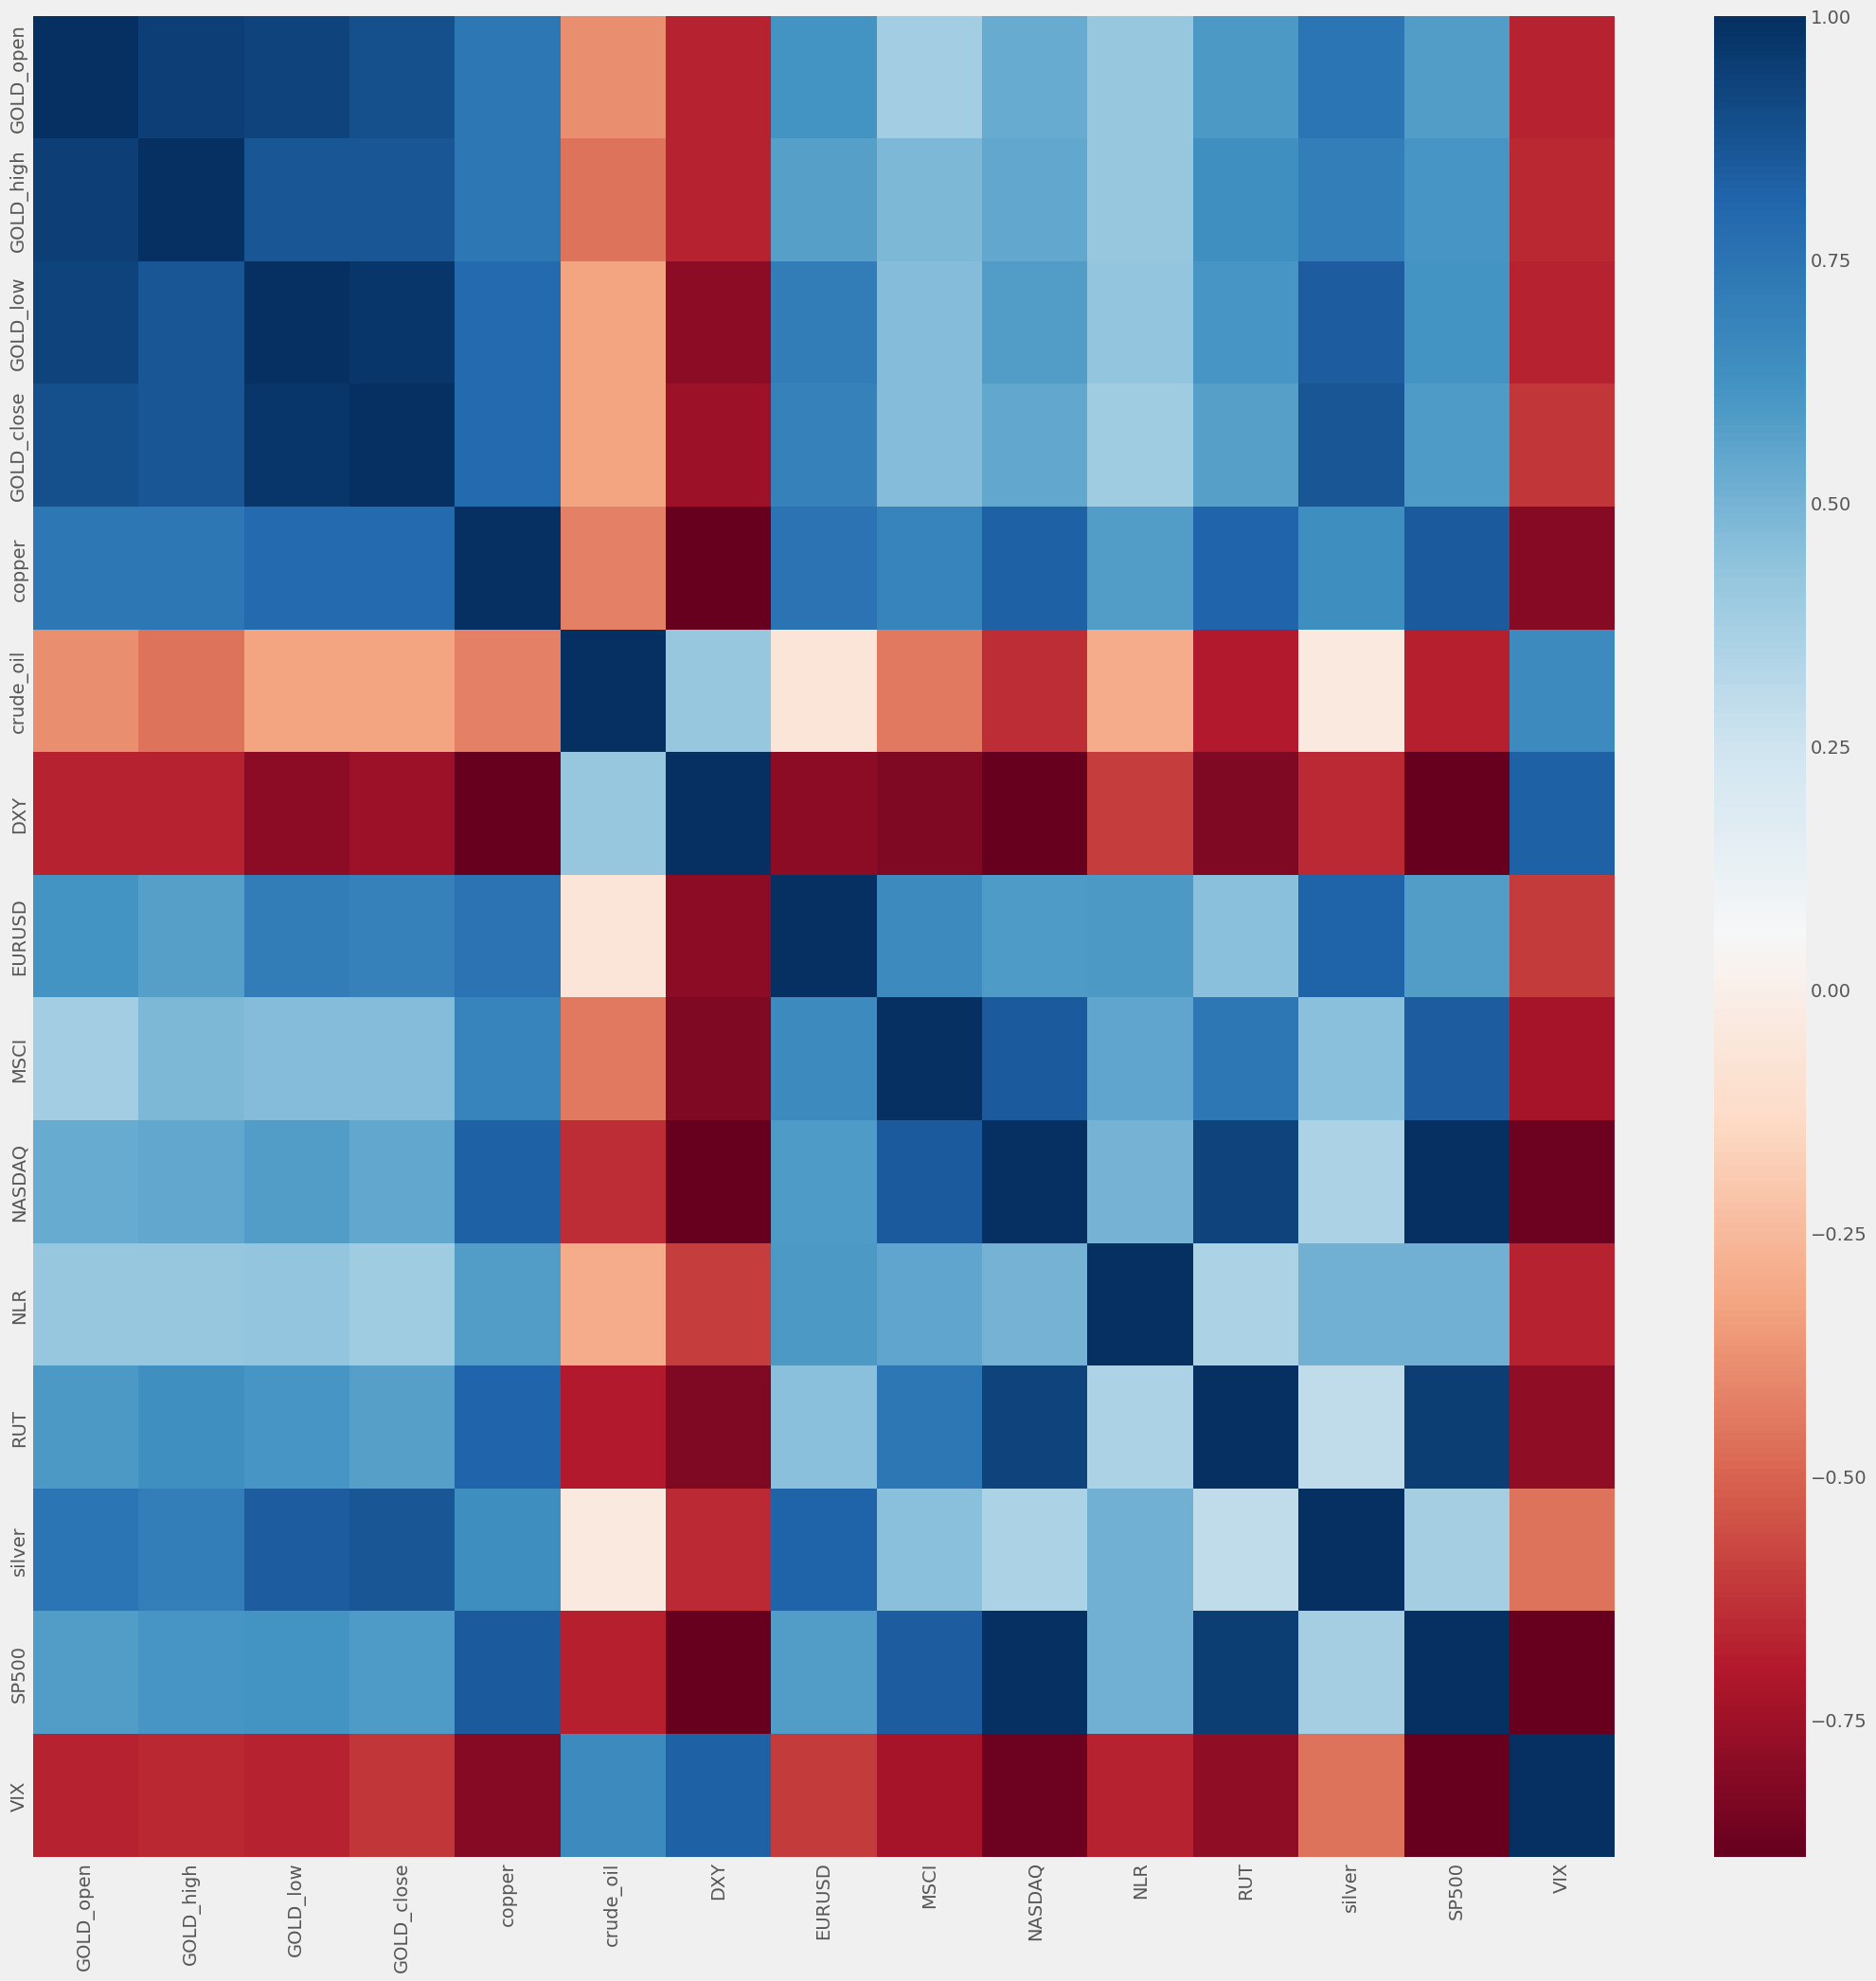

In [43]:
ds = merged_data.set_index('date') 
plt.style.use('fivethirtyeight')
sns.heatmap(ds.corr(), cmap="RdBu")

In [44]:
# Retrieve the number of categorical fields and numerical fields
# field indices where column is categorical
categorical_col_idx = np.where(ds.dtypes == object)[0]
# field indices where column is numerical
numerical_col_idx = np.where(ds.dtypes != object)[0]
print("Number of categorical fields: ", categorical_col_idx.shape[0])
print("Number of numerical fields: ", numerical_col_idx.shape[0])

Number of categorical fields:  0
Number of numerical fields:  15


### Handling Outliers 

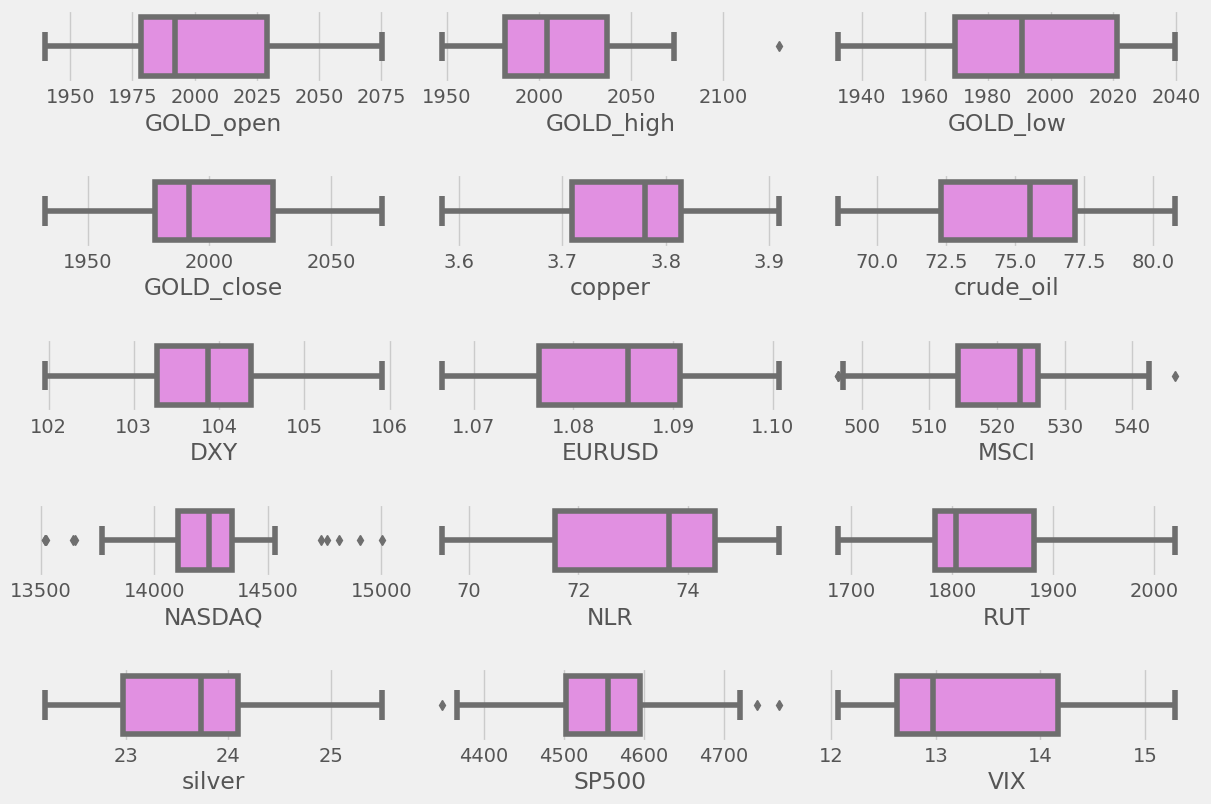

In [45]:
fig = plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
temp = merged_data.drop("date", axis=1).columns.tolist()
cols = 3
rows = (len(temp) + cols - 1) // cols  

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=merged_data, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

# Data Transforming

## 5. Feature Engineering

### Preparing X and y to do train test split

In [46]:
# select the features and target variable
from sklearn.model_selection import train_test_split

X = merged_data.drop(['date', 'GOLD_close'], axis=1)
 
y = merged_data['GOLD_close']
# dividing dataset in to train test
x_train, x_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

## 6. Feature Selection

Using the "Extra Trees Regressor" tool of the Scikitlearn library to create a graph that visually shows the importance of the independent variables X to the dependent variable Y in the forecasting model

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

feat_selection = ExtraTreesRegressor()
feat_selection.fit(X,y)

ExtraTreesRegressor()

In [48]:
print(feat_selection.feature_importances_)

[0.1657158  0.19331615 0.47892983 0.0093739  0.00770999 0.01966911
 0.02007349 0.004477   0.00365488 0.00282176 0.00473665 0.04334744
 0.01120119 0.0349728 ]


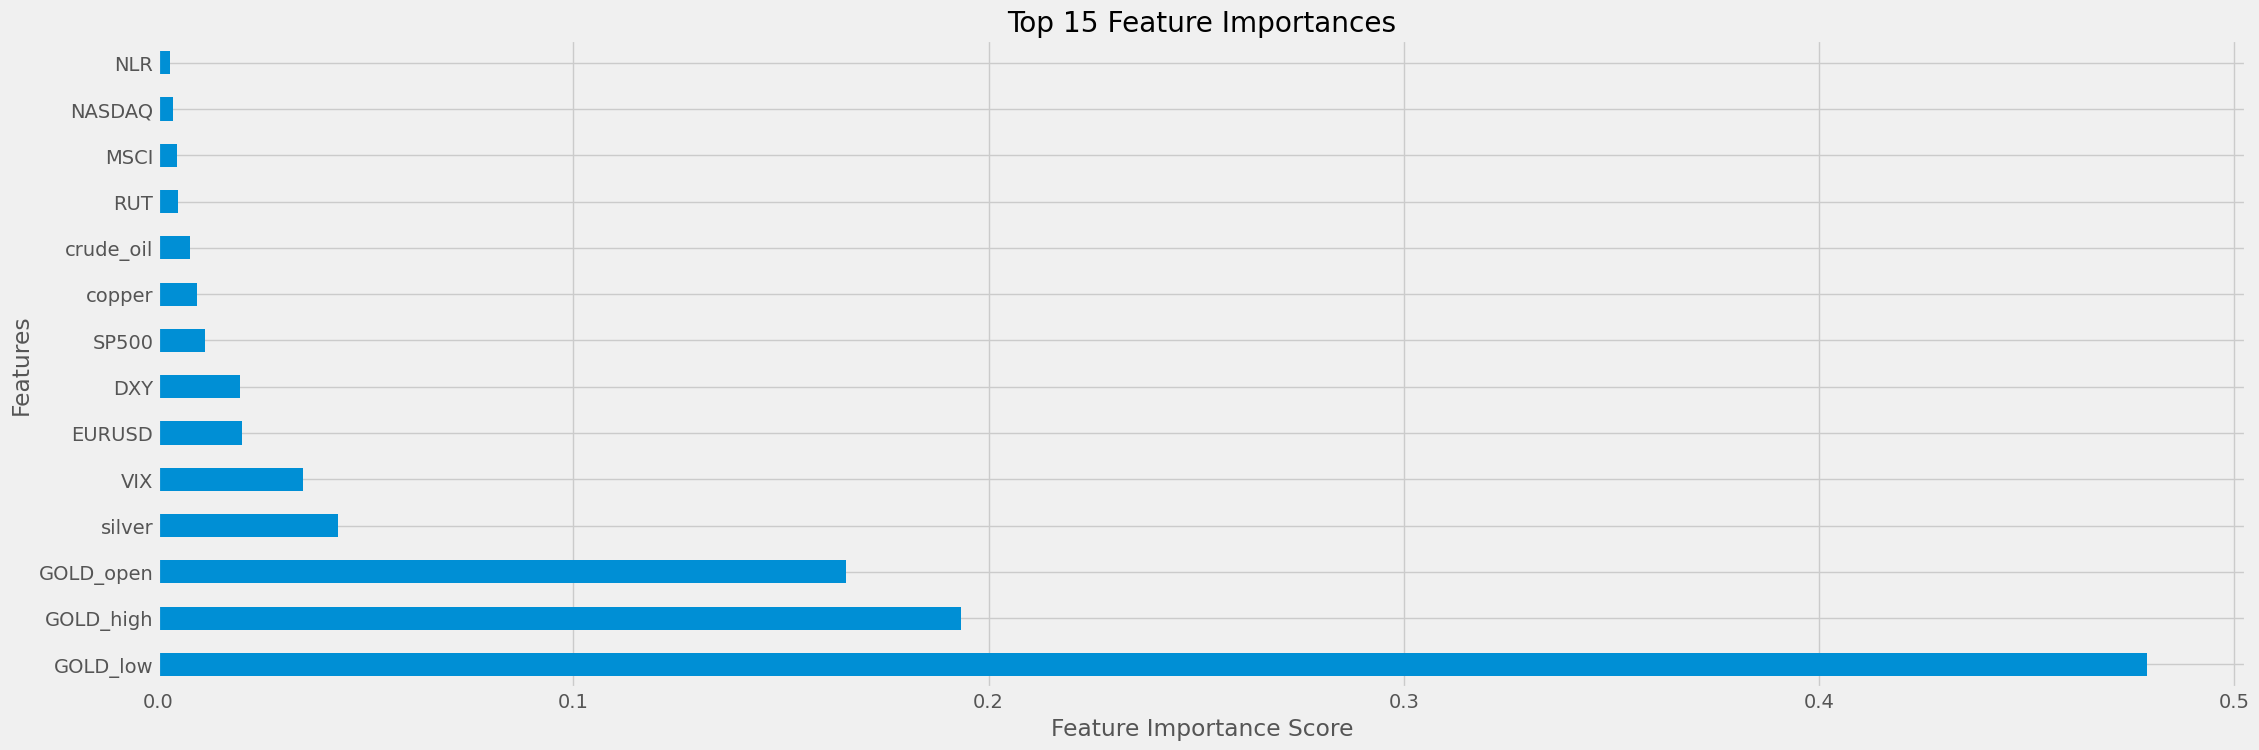

In [49]:
feat_importances = pd.Series(feat_selection.feature_importances_, index=X.columns)

# Set the figure size
plt.figure(figsize=(24, 8)) 
plt.style.use('fivethirtyeight')
# Plot the horizontal bar chart
feat_importances.nlargest(15).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances')
plt.show()

In [50]:
merged_data

,date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,RUT,silver,SP500,VIX
0,2023-12-19,2025.2,2042.7,2025.2,2038.4,3.8960,73.44,102.17,1.0924,542.53,15003.22,70.24,2020.95,24.040,4768.37,12.53
1,2023-12-18,2024.3,2032.8,2024.0,2026.3,3.8480,72.47,102.51,1.0895,532.86,14904.81,71.50,1982.42,23.831,4740.56,12.56
2,2023-12-15,2032.6,2043.4,2018.3,2021.1,3.8850,71.43,102.55,1.0994,531.58,14813.92,74.05,1985.13,23.870,4719.19,12.28
3,2023-12-14,2024.7,2040.1,2024.3,2030.2,3.8885,71.58,101.96,1.0886,542.11,14761.56,75.67,2000.51,24.096,4719.55,12.48
4,2023-12-13,1978.5,2024.8,1975.0,1982.3,3.7860,69.47,102.87,1.0799,546.37,14733.96,73.85,1947.51,22.639,4707.09,12.19
5,2023-12-12,1984.2,1994.2,1977.8,1977.8,3.7860,68.61,103.87,1.0767,526.02,14533.40,73.86,1881.27,22.728,4643.70,12.07
6,2023-12-11,2004.1,2004.2,1977.2,1978.0,3.7800,71.32,104.10,1.0766,516.61,14432.49,73.66,1883.68,22.773,4622.44,12.63
7,2023-12-08,2031.7,2033.1,1995.0,1998.3,3.8200,71.23,104.01,1.0792,506.68,14403.97,73.63,1880.82,22.971,4604.37,12.35
8,2023-12-07,2029.2,2034.9,2024.0,2029.9,3.7845,69.34,103.54,1.0767,508.44,14339.99,73.02,1868.25,23.732,4585.59,13.06
9,2023-12-06,2019.9,2035.8,2019.0,2030.5,3.7165,69.38,104.15,1.0794,515.11,14146.71,73.07,1852.05,23.889,4549.34,12.97


# Finishing Touch

In [51]:

# Specify a different directory with write permissions
#output_directory = os.path.expanduser("merged_data")
#os.makedirs(output_directory, exist_ok=True)

# Create 'data_preparation.csv' file
#output_file_path = os.path.join(output_directory, 'data_preparation.csv')
merged_data.to_csv('data_new.csv', index=False)

print(f'The merged data is saved to: data_preparation.csv')

The merged data is saved to: data_preparation.csv
